    """
    :param input_tensor: Входное изображение (трехмерный массив)
    :param in_channels: Количество каналов во входном изображении
    :param out_channels: Количество каналов в выходном изображении
    :param kernel_size: Размер ядра свертки
    :param stride: Шаг свертки
    :param padding: Дополнение (padding) изображения перед сверткой
    :param padding_mode: Режим дополнения: 'constant', 'reflect', 'replicate' или 'circular'
    :param dilation: Разреживание между элементами ядра
    :param groups: Количество блокированных соединений от входных каналов к выходным каналам
    :param bias: Если True, добавляет обучаемое смещение к результату
    :return: Результат свертки
    """

In [1]:
import numpy as np

def convolution2d(input_tensor, in_channels, out_channels, kernel_size, stride=1, padding=0, padding_mode='zeros', dilation=1, groups=1, bias=True):
    if padding > 0:
        input_tensor = np.pad(input_tensor, ((0, 0), (padding, padding), (padding, padding)), mode=padding_mode, constant_values=0)

    input_channels, input_height, input_width = input_tensor.shape
    kernel_height, kernel_width = kernel_size if isinstance(kernel_size, tuple) else (kernel_size, kernel_size)

    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    
    output = np.zeros((out_channels, output_height, output_width))
    
    for i in range(0, input_height - kernel_height * dilation + 1, stride):
        for j in range(0, input_width - kernel_width * dilation + 1, stride):
            input_patch = input_tensor[:, i:i + kernel_height * dilation:groups, j:j + kernel_width * dilation:groups]
            output[:, i // stride, j // stride] = np.sum(input_patch * np.ones((1, in_channels, 1, 1)) * np.ones((out_channels, 1, 1, 1)), axis=(1, 2, 3))

    if bias:
        bias_values = np.random.randn(out_channels)
        output += bias_values.reshape(-1, 1, 1)
    
    return output


In [2]:
input_tensor = np.random.randn(3, 128, 128)  

in_channels = 3
out_channels = 1
kernel_size = (3, 3)
stride = 1
padding = 0
padding_mode = 'constant'
dilation = 1  
groups = 3  
bias = True


result = convolution2d(input_tensor, in_channels, out_channels, kernel_size, stride, padding, padding_mode, dilation, groups, bias)

print("Исходное изображение:")
print(input_tensor)
    
print("\nРезультат свертки:")
print(result)

Исходное изображение:
[[[-7.66733019e-02  8.37167679e-01  5.87808122e-02 ...  1.98556247e+00
   -8.59728172e-01 -1.37792988e+00]
  [-1.82525839e+00 -2.44813328e-01 -1.76212763e+00 ...  1.59089352e+00
    3.17175802e-02 -1.54342835e+00]
  [ 1.94810487e-01  1.05928632e+00 -1.18211247e+00 ... -1.19429520e+00
    8.39655991e-01  7.33173934e-01]
  ...
  [-1.26846970e+00  1.86102060e+00  9.23438740e-01 ... -1.81635525e+00
    1.99873293e-01 -2.43148398e-01]
  [ 1.02559880e-01  2.25573124e-01 -1.87386601e+00 ... -1.36832102e+00
    1.10076488e-03  3.14508990e-01]
  [-6.24973997e-01 -6.52374204e-01 -9.54444588e-03 ...  1.84344576e+00
    1.70742460e-01 -6.72147255e-01]]

 [[ 1.22963801e+00  2.28823949e-01 -1.24671388e+00 ...  1.23947289e+00
   -1.20816527e+00  1.07349803e+00]
  [ 3.27638067e-01 -3.64983626e-01 -8.66852376e-01 ... -1.62104973e+00
   -7.22355880e-02 -2.04784100e-01]
  [ 1.38570657e+00  1.15823513e+00 -4.34155168e-02 ... -2.83844813e-01
   -8.89265207e-01  6.43989290e-02]
  ...
 

In [3]:
import matplotlib.pyplot as plt

def display_image_from_tensor(tensor):
    tensor = np.transpose(tensor, (1, 2, 0))  

    
    tensor = (tensor * 255).astype(np.uint8)

    
    plt.imshow(tensor)
    plt.axis('off')
    plt.show()



In [4]:
from PIL import Image
import numpy as np

def png_to_tensor(image_path):
    
    image = Image.open(image_path)

    image_array = np.array(image)
    if len(image_array.shape) == 2:
        
        image_array = np.expand_dims(image_array, axis=2)
    if image_array.shape[2] == 1:
        image_array = np.concatenate([image_array] * 3, axis=2)
    tensor = image_array.astype(np.float32) / 255.0

    tensor = np.transpose(tensor, (2, 0, 1))

    return tensor


image_path = "pepe.webp"
image_tensor = png_to_tensor(image_path)

  
print("Shape of the image tensor:", image_tensor.shape)


Shape of the image tensor: (3, 225, 225)


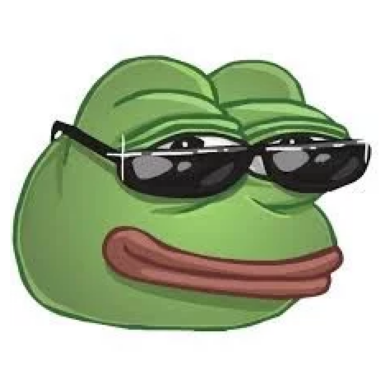

In [5]:
display_image_from_tensor(image_tensor)

In [6]:
in_channels = 3
out_channels = 1
kernel_size = (3, 3)
stride = 2
padding = 1
padding_mode = 'constant'
dilation = 1  
groups = 1  
bias = True


pepe = convolution2d(image_tensor, in_channels, out_channels, kernel_size, stride, padding, padding_mode, dilation, groups, bias)

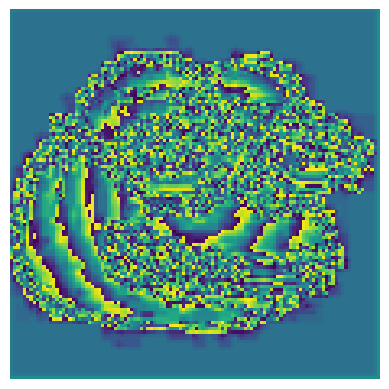

In [7]:
display_image_from_tensor(pepe)